## 가설 검정단계

- 가설을 세운다
- 기준을 세운다 => 검정 통계량을 구한다
- 결론을 내린다 => p_value 참고

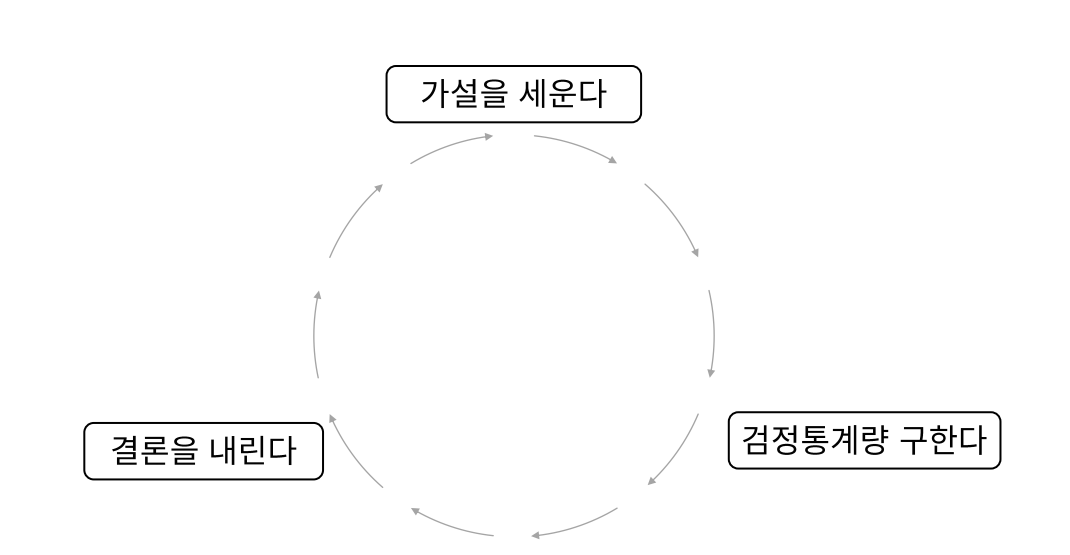

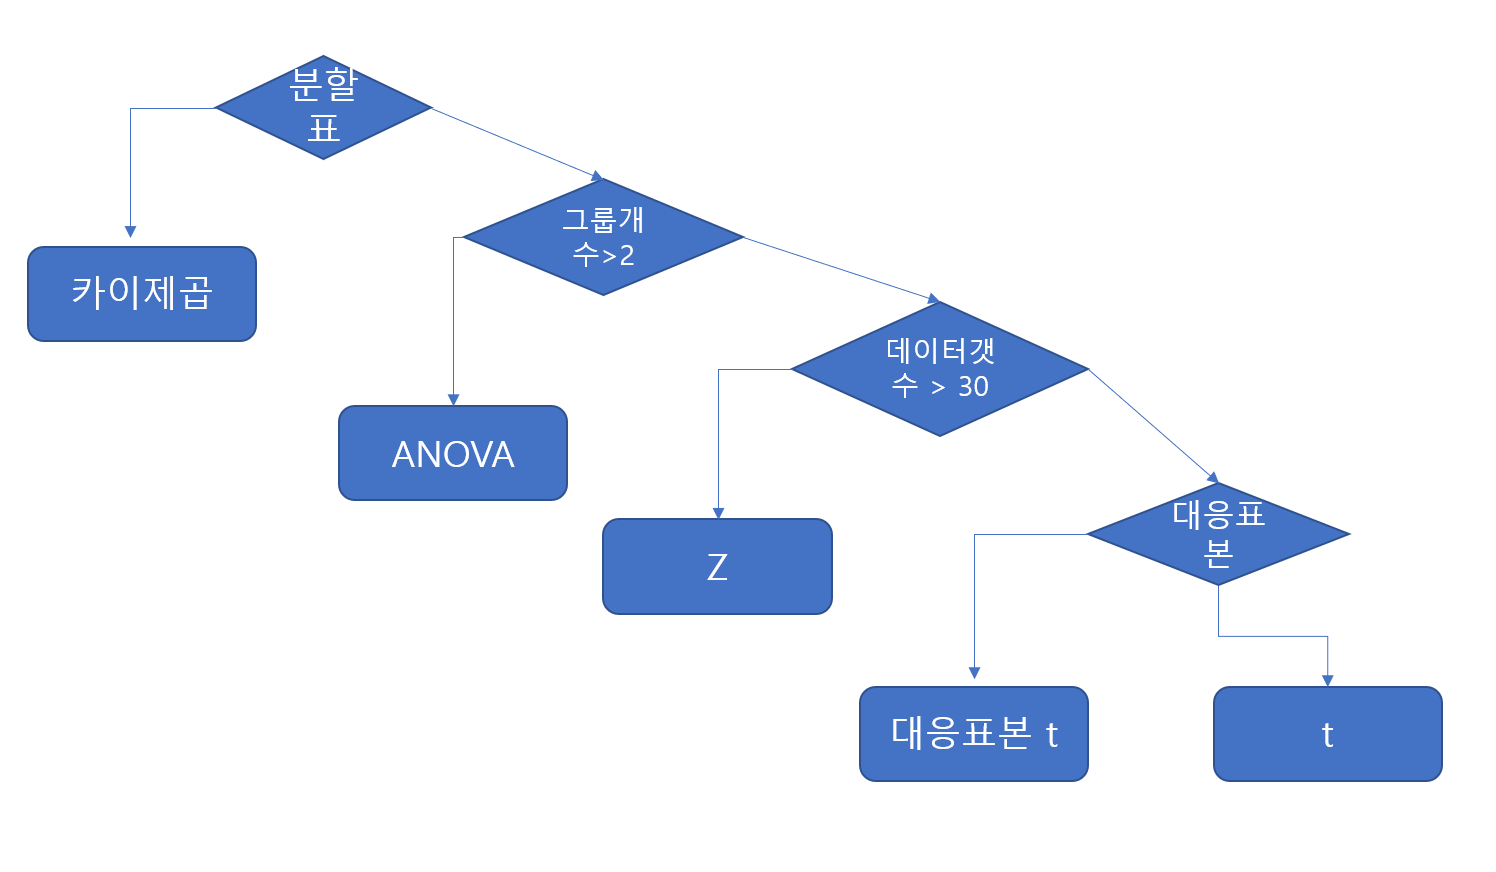

### p-value란?

- 귀무 가설이 참이라고 했을 때 표본 데이터가 수집될 확률
- P-value가 낮을 수록 대립가설 채택
- 통상적으로 p-value < 0.05 면 대립가설 채택
- 이때 0.05를 유의 수준이라고 하며 대게 0.05 또는 0.01 중 선택 

# 통계적 가설검정

In [1]:
import numpy as np
import pandas as pd
from scipy import stats

%precision 3
np.random.seed(1111)

#### 단일 표본 t 검정 - sample은 정규성을 띈다

- 목적 : 그룹의 평균이 기준값과 차이가 있는지를 확인

- 귀무가설 : sample의 평균과 모집단의 평균은 같다
- 대립가설 : sample의 평균과 모집단의 평균은 다르다

- 가설 수립 예시 : 한 사이트를 운영하고 있는데 고객이 웹사이트에서 체류하는 평균시간이 10분이지 아닌지를 알고 싶어 가설 수립

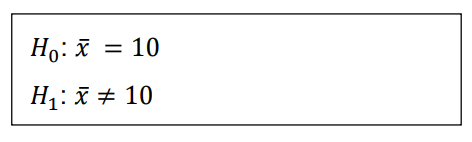

####  선행조건

- 해당 변수가 정규분포를 따라야 함 : 정규성 검정이 선행되어야 함
    - 단, 샘플수가 많을수록 정규성을 띌 가능성이 높아지므로, 샘플수가 부족한 경우에만 정규성 검정을 수행
    - 만약, 정규성을 띄지 않으면 비모수적인 방법인 부호검정 을 진행
    
    
#### t 통계량

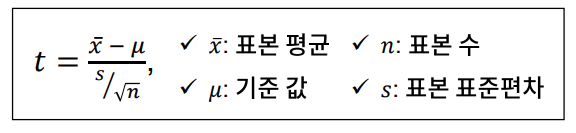

#### 검정 방법 : sapiro 검정

- 정규성 검정
     - Shapiro-Wilk 테스트는 데이터가 정규 분포에서 추출되었다는 귀무 가설을 테스트
 - scipy.stats.shapiro(x)

In [2]:
import pandas as pd
import numpy as np

In [3]:
# data 불러오기
import os

with open('./data/성인여성_키_데이터.txt','r')as f :
    data = f.read().split('\n')
    data = list(map(float, data))

In [5]:
data[:3]
len(data)

25

In [6]:
# 정규성 검정
from scipy.stats import *
shapiro(data)
# pvalue 0.05보다 크므로 귀무가설을 기각할 수 없다 * 정규분포를 따른다 *

ShapiroResult(statistic=0.9535808563232422, pvalue=0.30142757296562195)

In [7]:
# 단일 표본 t 검정 수행 = 검증 수치 163
# 한 집단 평균 검정 ttst_1smp(집단, popmean=모집단 평균)
# 귀무가설을 : 집단의 평균은 모집단의 평균과 같다
print(ttest_1samp(data,163))
np.mean(data)

# pvalue가 0.05미만 이므로 귀무가설을 기각
# 통계량이 음수이므로 data의 평균 < 163
# 평균은 통계랑에 의해 163미만임

156.9332

#### 독립 표본 t 검정
- 서로다른 data의 평균 비교
- 귀무가설 : 두 집단의 평균은 같다
- 대립가설 : 두 집단의 평균은 차이가 있다


- 반별 점수 차가 있는지?

- 두 집단은 정규성을 띄어야 한다, 두 집단의 분산에 따라 다른 검정식을 사용한다


#### 선행조건

- 독립성 : 두 그룹은 서로 독립적이어야 함
- 정규성 : 데이터는 정규분포를 따라야 함
    - 만약, 정규성을 띄지 않으면 비모수적인 방법인 부호검정 을 진행
    
- 등분산성 : 두 그릅의 데이터에 대한 분산이 같아야 함
    - Levene의 등분산 검정 : p-value가 0.05 미만이면 분산이 다르다고 판단
    - 분산이 같은지 다른지에 따라 사용하는 통계량이 달라지므로, 설정을 달리 한다
    
    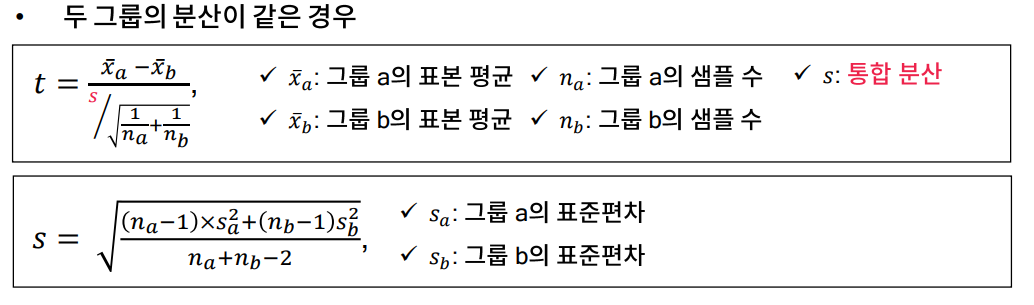
    
    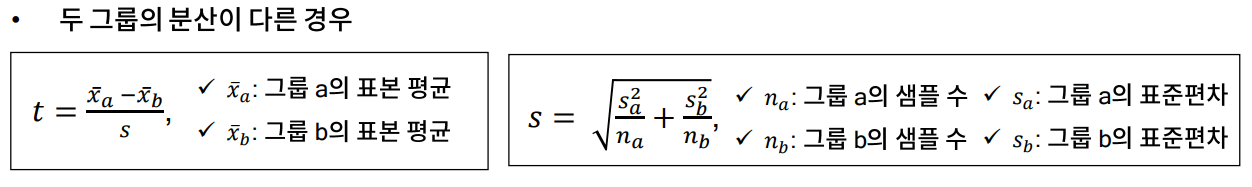

In [10]:
df1 = pd.read_csv("./data/반별_점수_type1.csv", encoding='ANSI')
df1.head()

,반,점수
0,A,73
1,A,69
2,A,71
3,A,71
4,A,73


- 두 집단의 평균 차이 검정

In [14]:
# 데이터 분리
groupA = df1['점수'].loc[df1['반']=='A'].values # ndarray 형태
groupB = df1['점수'].loc[df1['반']=='B'].values
print(groupA, groupA.mean())
print(groupB, groupB.mean())

[73 69 71 71 73 67 73 69 62 74 68 66 70 82 70 65 76 73 58 81] 70.55
[63 56 73 61 55 77 75 65 61 55] 64.1


In [15]:
# shapiro를 이용한 정규성 검정: 모두 정규 분포를 띔을 확인 - pvalue가 0.05보다 크다
print(shapiro(groupA))
print(shapiro(groupB))

ShapiroResult(statistic=0.9696965217590332, pvalue=0.7484514117240906)
ShapiroResult(statistic=0.8888435363769531, pvalue=0.16456004977226257)


In [17]:
# 등분산 검정
levene(groupA,groupB)
# pavalue가 0.05보다 크므로 등분산을 띈다


LeveneResult(statistic=2.033067087400979, pvalue=0.164964086222101)

- 두 집단의 분산 확인 - 분산의 성질이 같다

In [18]:
np.var(groupA)

30.6475

In [19]:
np.var(groupB)

61.69000000000001

In [20]:
# equal_var = True 두 집단이 등분산일때
ttest_ind(groupA,groupB,equal_var = True)
# pvalue가 0.05보다 작으므로 귀무가설 기각
# A와 B간에 평균적인 차이가 존재함을 확인

Ttest_indResult(statistic=2.5128526794964134, pvalue=0.01801095352893767)

In [28]:
# scipy.stats.mannwhitneyu(a,b): 정규성검정이 만족하지 않으면 수행

#### Tip. 다른 포맷의 데이터 처리

In [21]:
df2 = pd.read_csv('./data/반별_점수_type2.csv', encoding='cp949')
df2.head()
# b반의 데이터는 float이므로 non값이 들어있을 가능성이 있음

In [31]:
groupA = df2['A반'].dropna().values
groupB = df2['B반'].dropna().values
print(groupA)
print(groupB)

In [32]:
print(shapiro(groupA))
print(shapiro(groupB))

ShapiroResult(statistic=0.9696965217590332, pvalue=0.7484514117240906)
ShapiroResult(statistic=0.8888435363769531, pvalue=0.16456004977226257)


In [22]:
levene(groupA,groupB)

LeveneResult(statistic=2.033067087400979, pvalue=0.164964086222101)

In [34]:
ttest_ind(groupA,groupB,equal_var=True)

Ttest_indResult(statistic=2.2165772005780684, pvalue=0.04454669638896435)


p-value가 0.05미만이므로 귀무가설을 기각한다. 평균의 차이가 있다